In [1]:
import numpy as np
import datetime as dt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
dataset = pd.read_csv('/kaggle/input/ecommerce-dataset-for-predictive-marketing-2023/ECommerce_consumer behaviour.csv')

## <p style="background-color:#3844a1;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px;">Supermarket dataset for predictive marketing 2023 </span>
## <b><span style='color:#246a13'> Business Understanding</span></b>

Hunter's e-grocery is a renowned up-and-coming new generation lifestyle brand. We have our brand presence in 10 counties and are always looking for new ways to improve and anticipate our customer needs. black swan events like Covid-19, Ukraine war, Gas shortage has definitely impacted the way our customers shop in our store. Please use the dataset to propose business value for informative based decision making.

In [3]:
dataset.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables


## <p style="background-color:#3844a1;font-family:newtimeroman;color:#FFF9ED;font-size:110%;text-align:center;border-radius:10px;">Data Understanding </span>

Supermarket consumer behaviour dataset consists of 2019501 Rows & 12 Columns
 * order_id – (A unique number to identity the order)
 * user_id - (A unique number to identify the user)
 * order_number – (Number of the order)
 * order_dow – (Day of the Week the order was made)
 * order_hour_of_day – (Time of the order)
 * days_since_prior_order - (History of the order)
 * product_id – (Id of the product)
 * add_to_cart_order – (Number of items added to cart)
 * reordered – (If the reorder took place)
 * department_id - (Unique number allocated to each department)
 * department – (Names of the departments)
 * product_name – (Name of the products)

## <b><span style='color:#246a13'> Get information on the data</span></b>

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   department_id           int64  
 10  department              object 
 11  product_name            object 
dtypes: float64(1), int64(9), object(2)
memory usage: 184.9+ MB


In [5]:
dataset.isnull().sum()

order_id                       0
user_id                        0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    124342
product_id                     0
add_to_cart_order              0
reordered                      0
department_id                  0
department                     0
product_name                   0
dtype: int64

In [6]:
print(124342/2_019_501)

0.06157065532525114


## <b> <span style='color:#246a13'> Taking care of Null values</span></b>

#### <b><span style='color:#FF0000'> NOTE :</span></b>
Considering that the data pertains to an online store, it is reasonable to postulate that the null values hold significance and do not imply missing data. Given that the data was not gathered manually, it is my opinion that the null values pertain to initial users who have not placed an order previously.

In [7]:
dataset['days_since_prior_order'].unique()

array([nan,  3.,  6.,  7., 30., 20.,  4.,  8., 15., 10., 28.,  9., 12.,
       11.,  2., 25., 13., 29., 14., 21.,  5.,  1., 18.,  0., 19., 17.,
       22., 26., 24., 16., 23., 27.])

In [8]:
dataset['days_since_prior_order'] = dataset['days_since_prior_order'].fillna(-1)
dataset['days_since_prior_order']= dataset['days_since_prior_order'].astype(np.int64)

<p style="background-color:#3844a1;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;"> DATA PREPARATION</p>

## <b> <span style='color:#246c12'> Investigating all elements within each feature</span></b>

In [9]:
for column in dataset.columns:
    unique_values = dataset[column].unique()
    nr_values = len(unique_values)
    if nr_values < 23:
        print("The number of unique values for feature {} : {} --- {}".format(column, nr_values, unique_values))
    else:
        print("The number of unique values for feature {} : {}".format(column, nr_values))

The number of unique values for feature order_id : 200000
The number of unique values for feature user_id : 105273
The number of unique values for feature order_number : 100
The number of unique values for feature order_dow : 7 --- [2 3 0 1 6 5 4]
The number of unique values for feature order_hour_of_day : 24
The number of unique values for feature days_since_prior_order : 32
The number of unique values for feature product_id : 134
The number of unique values for feature add_to_cart_order : 137
The number of unique values for feature reordered : 2 --- [0 1]
The number of unique values for feature department_id : 21 --- [13 16  4 15 12  1  3  7 14 19  6 17 11 18 20  9 21  5  8 10  2]
The number of unique values for feature department : 21 --- ['pantry' 'dairy eggs' 'produce' 'canned goods' 'meat seafood' 'frozen'
 'bakery' 'beverages' 'breakfast' 'snacks' 'international' 'household'
 'personal care' 'babies' 'deli' 'dry goods pasta' 'missing' 'alcohol'
 'pets' 'bulk' 'other']
The number

In [10]:
dataset = dataset[dataset['department'] != 'missing']

<p style="background-color:#3844a1;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;"> RFM Analysis</p>

**The first step in building an RFM model is to assign Recency, Frequency and Monetary values to each customer. So, RFM analysis can be carried out only on customers who have customerID.**

**RFM Metrics**

- **Recency : It is the amount of time since the customers most recent transaction. It is measured in days.**

- **Frequency: Total number of transactions made by the customer.**

- **Monetary : Total amount the customer has spent across all transactions.**

**In order to assign weights to each department, we researched the average price of products in each category from external sources. Using this data, we created a weight table based on the average price of each category. To do this, we divided the average price of each department by the overall average price of all departments, and then multiplied by the total number of departments. This allowed us to assign a weight to each department that takes into account its average price relative to the other departments.**

**The resulting weights are based on the average price of each category and provide a measure of the relative importance of each department in the dataset. It's worth noting that the weights are based on external data and may not perfectly reflect the prices of the products in our specific dataset. However, they provide a useful starting point for further analysis and can be updated as more accurate data becomes available.**

**In summary, we have assigned weights to each department based on the average price of products in each category. These weights allow us to analyze the dataset and draw conclusions about the relative importance of each department in our analysis.**

In [11]:
weights = {
    'pantry': 6.25,
    'dairy eggs': 8.75,
    'produce': 10.0,
    'canned goods': 6.875,
    'meat seafood': 22.5,
    'frozen': 7.5,
    'bakery': 5.0,
    'beverages': 6.875,
    'breakfast': 8.125,
    'snacks': 6.25,
    'international': 11.25,
    'household': 13.75,
    'personal care': 15.0,
    'babies': 17.5,
    'deli': 20.0,
    'dry goods pasta': 5.0,
    'alcohol': 25.0,
    'pets': 11.25,
    'bulk': 6.25,
    'other': 6.25,
}


total_weight = sum(weights.values())
weights = {k: v/total_weight*100 for k, v in weights.items()}

# Calculate Recency
reference_id = dataset['order_id'].max()
recency = dataset.groupby('user_id')['order_id'].max().reset_index()
recency['Recency'] = reference_id - recency['order_id']
recency.drop(columns=['order_id'], inplace=True)
recency.columns = ['user_id', 'Recency']


# Calculate Frequency
frequency = dataset.groupby('user_id')['order_id'].nunique().reset_index()
frequency.columns = ['user_id', 'Frequency']

# Calculate Monetary value
dataset['weight'] = dataset['department'].map(weights)
monetary = dataset.groupby('user_id')['weight'].sum().reset_index()
monetary.columns = ['user_id', 'Monetary']

# Merge RFM metrics
rfm = recency.merge(frequency, on='user_id').merge(monetary, on='user_id')

## <b><span style='color:#246a13'>Calculate the score</span></b>
**We need to assign a score from 1 to 5 to recency, frequency and monetary value individually for each customer.**

**Below is the conversion of columns into rfm scores between 1 to 5.**

**'5' being the highest and '1' being the least.**

- **The higher the monetary value, higher is the score ie,'5'.**
- **Smaller value of recency indicates recent purchases, so it takes the higher value of 5.**
- **Frequency is the same as monetary, higher the frequency, higher the score.**

In [12]:
rfm['recency_score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])


rfm['frequency_score'] = pd.qcut(rfm['Frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

rfm['monetary_score'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

rfm['score']=rfm['recency_score'].astype(int)+rfm['frequency_score'].astype(int)+rfm['monetary_score'].astype(int)

In [13]:
rfm.head()

,user_id,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,score
0,2,1519513,2,57.549858,3,3,3,9
1,3,1383869,3,74.928775,3,4,4,11
2,7,3300027,1,105.128205,1,1,4,6
3,10,3337685,1,168.091168,1,1,5,7
4,11,499916,1,37.891738,4,1,2,7


In [14]:
rfm[rfm['score']== 15].sort_values('Monetary', ascending=False).head()

,user_id,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,score
64446,126305,8070,10,1563.247863,5,5,5,15
102700,201268,12288,9,1349.002849,5,5,5,15
58856,115495,14220,7,1342.450142,5,5,5,15
16229,31903,77844,6,1198.860399,5,5,5,15
53639,105213,73108,12,1150.427350,5,5,5,15


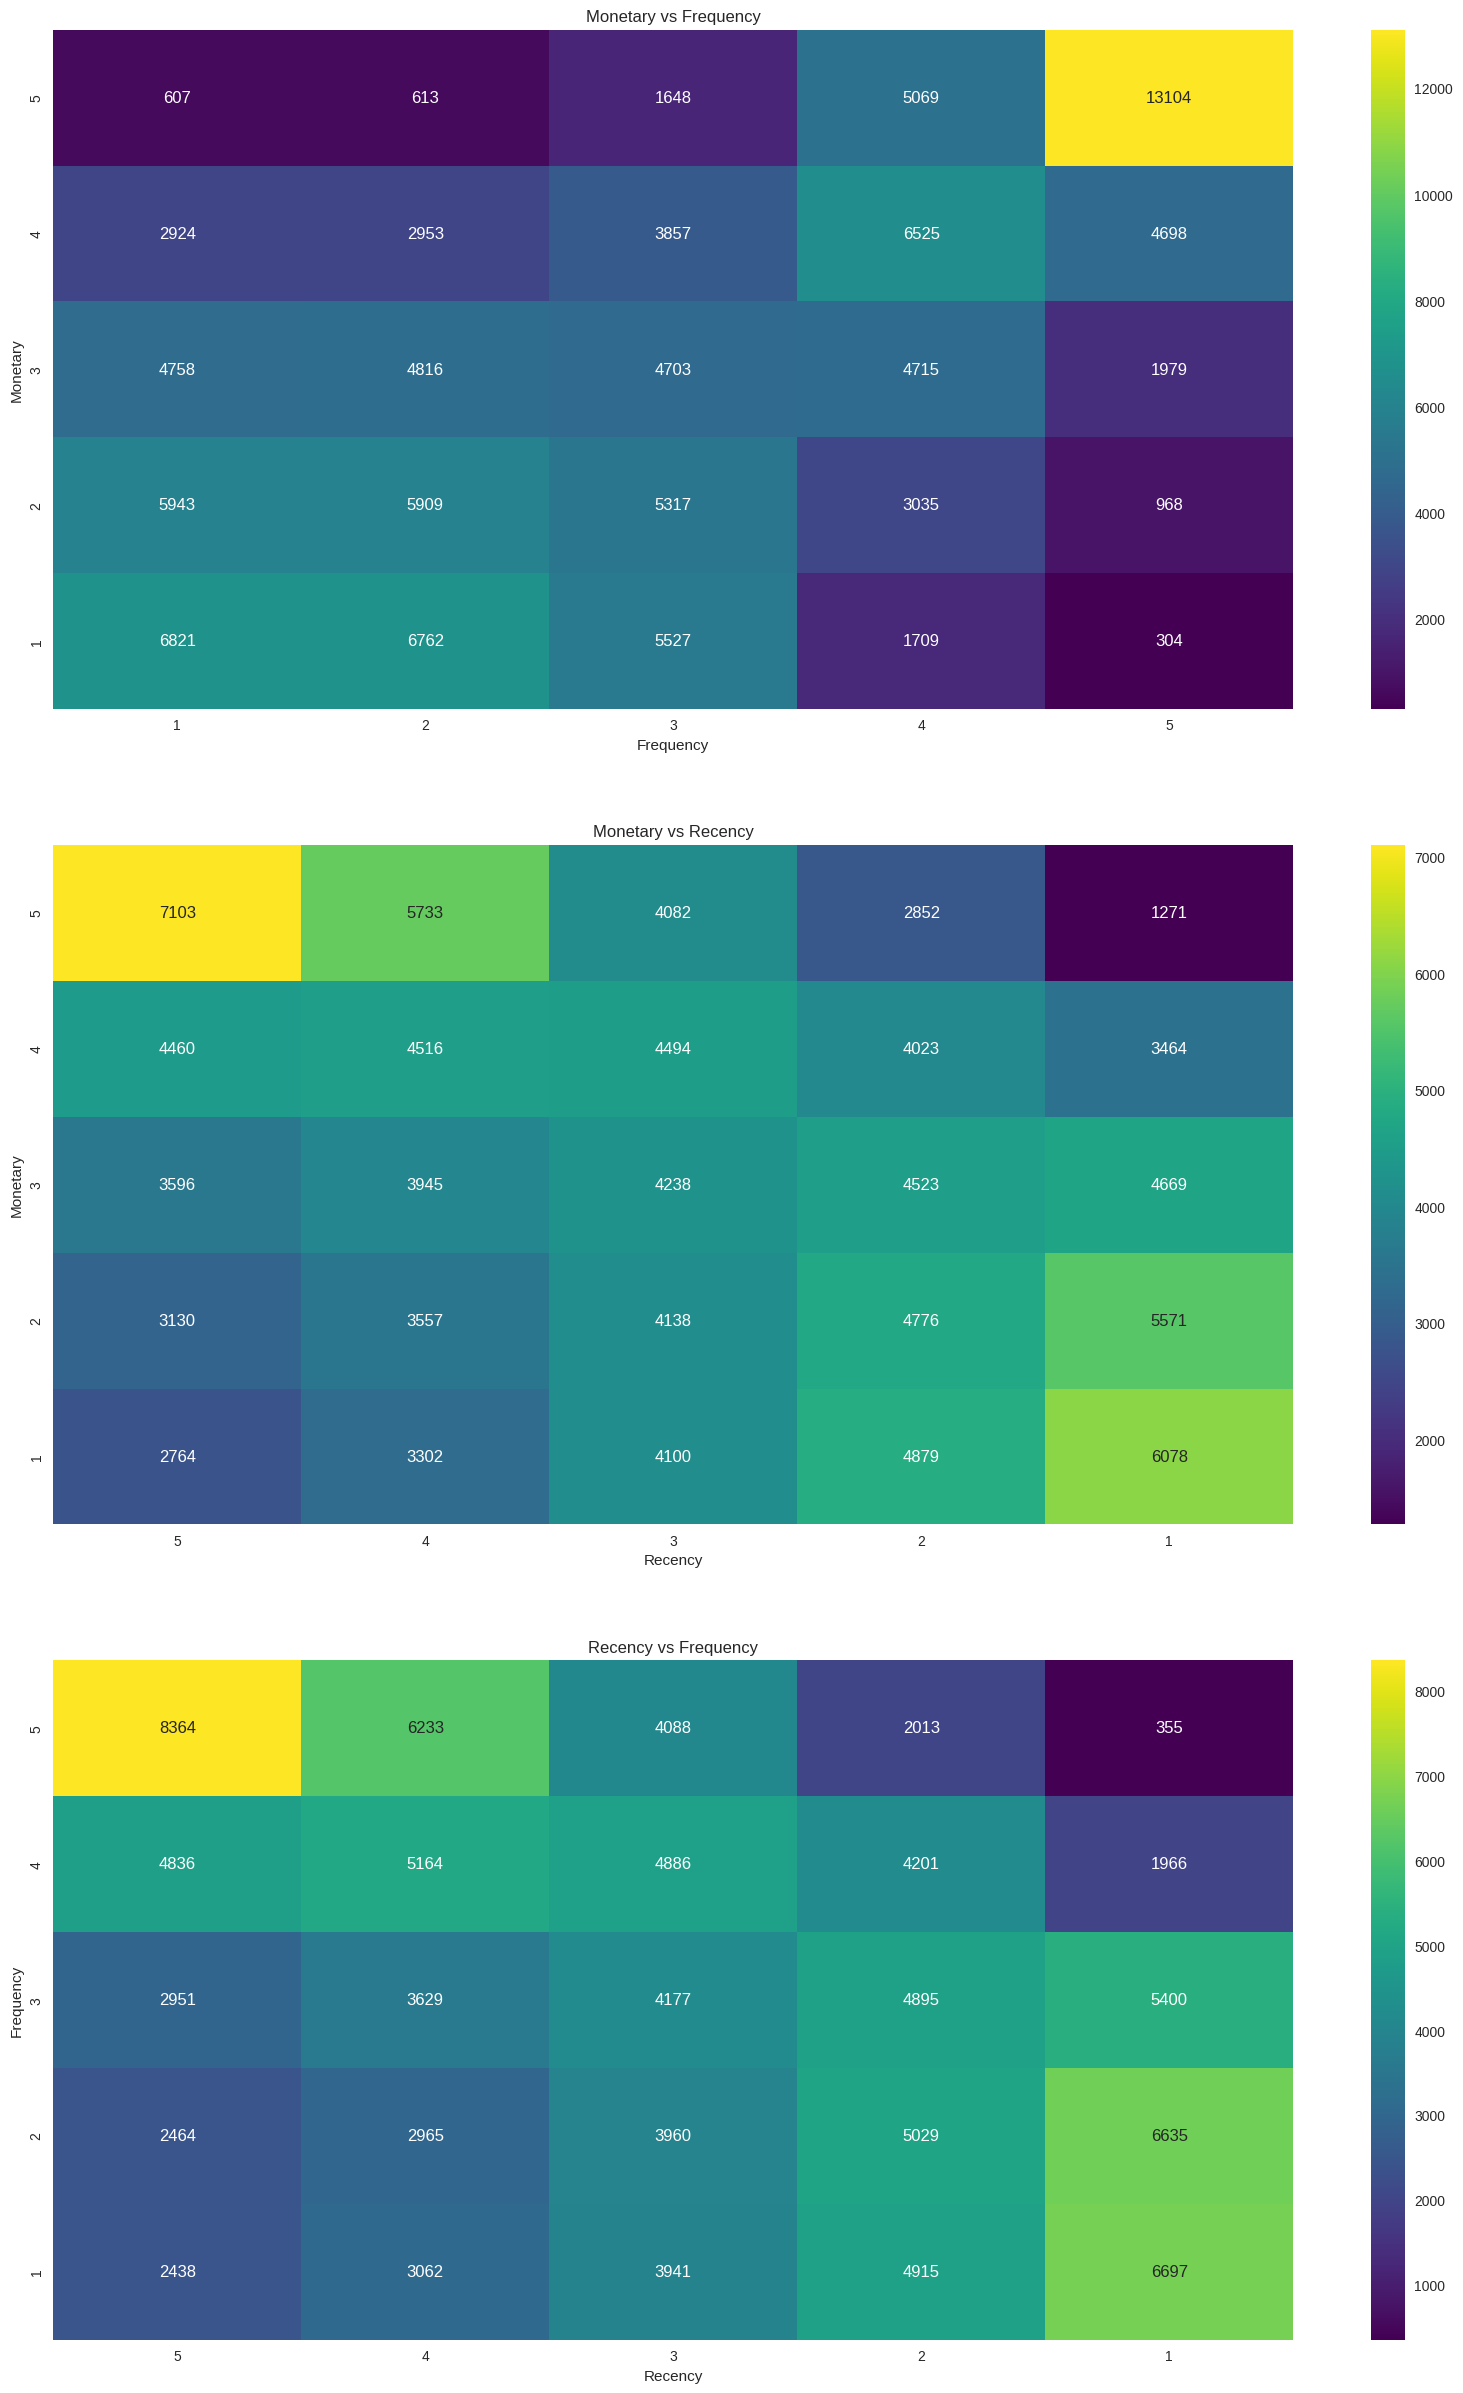

In [15]:
cross_table1 = pd.crosstab(index=rfm['monetary_score'], columns=rfm['frequency_score'])
cross_table2 = pd.crosstab(index=rfm['monetary_score'], columns=rfm['recency_score'])
cross_table3 = pd.crosstab(index=rfm['frequency_score'], columns=rfm['recency_score'])
plt.figure(figsize=(20,30))
plt.subplot(311)
ax1 = sns.heatmap(cross_table1, cmap='viridis', annot=True, fmt=".0f")
ax1.invert_yaxis()
ax1.set_ylabel('Monetary')
ax1.set_xlabel('Frequency')
ax1.set_title('Monetary vs Frequency')
plt.subplot(312)
ax2 = sns.heatmap(cross_table2, cmap='viridis', annot=True, fmt=".0f")
ax2.invert_yaxis()
ax2.set_ylabel('Monetary')
ax2.set_xlabel('Recency')
ax2.set_title('Monetary vs Recency')
plt.subplot(313)
ax3 = sns.heatmap(cross_table3, cmap='viridis', annot=True, fmt=".0f")
ax3.invert_yaxis()
ax3.set_ylabel('Frequency')
ax3.set_xlabel('Recency')
ax3.set_title('Recency vs Frequency')
plt.show()

<p style="background-color:#3844a1;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;"> Modeling</p>

## <b><span style='color:#246a13'>RFM Clustering</span></b>

**We are going to apply unsupervised machine learning to identify different groups/clusters based on segmentation of customers according to their purchasing behaviour.**

**The overall clusters will be based on the 3 factors - recency, frequency and monetary values**

In [16]:
working_set = rfm[['Recency', 'Monetary', 'Frequency']]
working_set.describe()

,Recency,Monetary,Frequency
count,1.052640e+05,105264.000000,105264.000000
mean,1.366267e+06,80.899274,1.899804
std,9.693920e+05,84.831567,1.394325
min,0.000000e+00,2.279202,1.000000
25%,5.123362e+05,27.635328,1.000000
50%,1.201956e+06,54.700855,1.000000
75%,2.131597e+06,103.133903,2.000000
max,3.421069e+06,1747.863248,15.000000


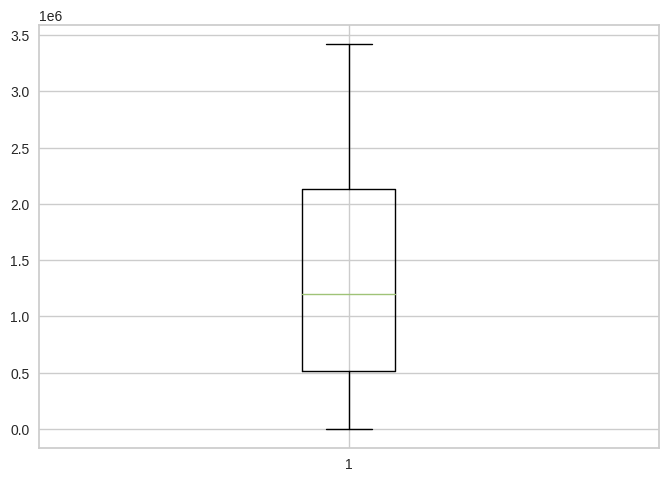

In [17]:
plt.boxplot(working_set.Recency)
Q1 = working_set.Recency.quantile(0.25)
Q3 = working_set.Recency.quantile(0.75)
IQR = Q3 - Q1
working_set = working_set[(working_set.Recency >= Q1 - 1.5*IQR) & (working_set.Recency <= Q3 + 1.5*IQR)]

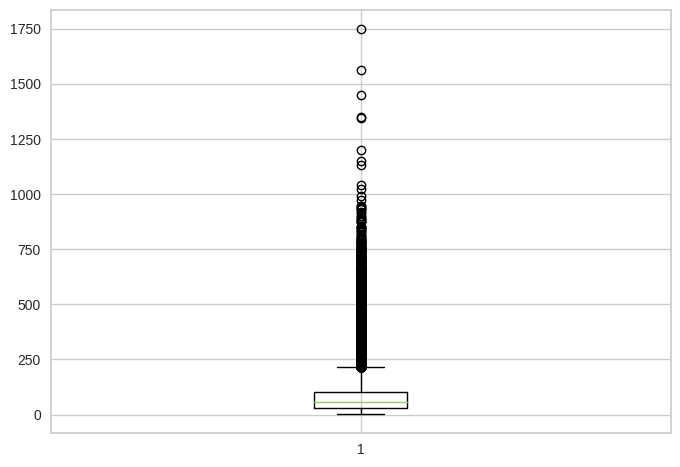

In [18]:
plt.boxplot(working_set.Monetary)
Q1 = working_set.Monetary.quantile(0.25)
Q3 = working_set.Monetary.quantile(0.75)
IQR = Q3 - Q1
working_set = working_set[(working_set.Monetary >= Q1 - 1.5*IQR) & (working_set.Monetary <= Q3 + 1.5*IQR)]

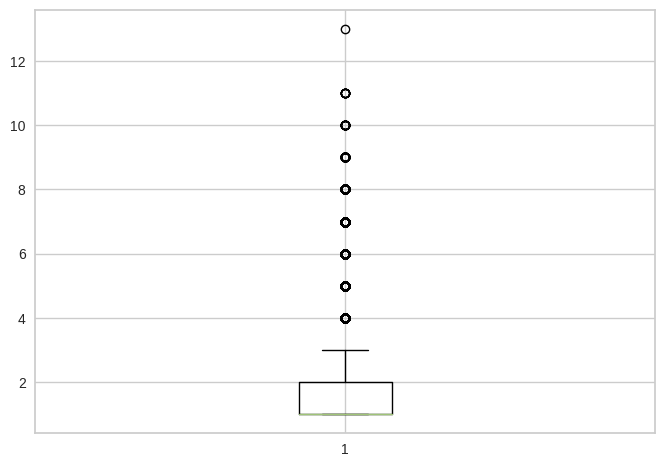

In [19]:
plt.boxplot(working_set.Frequency)
Q1 = working_set.Frequency.quantile(0.25)
Q3 = working_set.Frequency.quantile(0.75)
IQR = Q3 - Q1
working_set = working_set[(working_set.Frequency >= Q1 - 1.5*IQR) & (working_set.Frequency <= Q3 + 1.5*IQR)]

In [20]:
working_set.describe()

,Recency,Monetary,Frequency
count,9.126100e+04,91261.000000,91261.000000
mean,1.475935e+06,58.726674,1.472327
std,9.708073e+05,44.956357,0.677956
min,6.000000e+00,2.279202,1.000000
25%,6.227910e+05,24.501425,1.000000
50%,1.363228e+06,46.723647,1.000000
75%,2.268025e+06,81.766382,2.000000
max,3.421069e+06,216.239316,3.000000


In [21]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(working_set)
x_scaled

array([[ 0.04488861, -0.02617701,  0.77833369],
       [-0.09483505,  0.36039819,  2.25336297],
       [ 1.87895373,  1.03215182, -0.6966956 ],
       ...,
       [ 1.57705487, -0.70426793, -0.6966956 ],
       [ 0.6796432 ,  1.06383831,  0.77833369],
       [-0.37312044,  0.94342964,  2.25336297]])

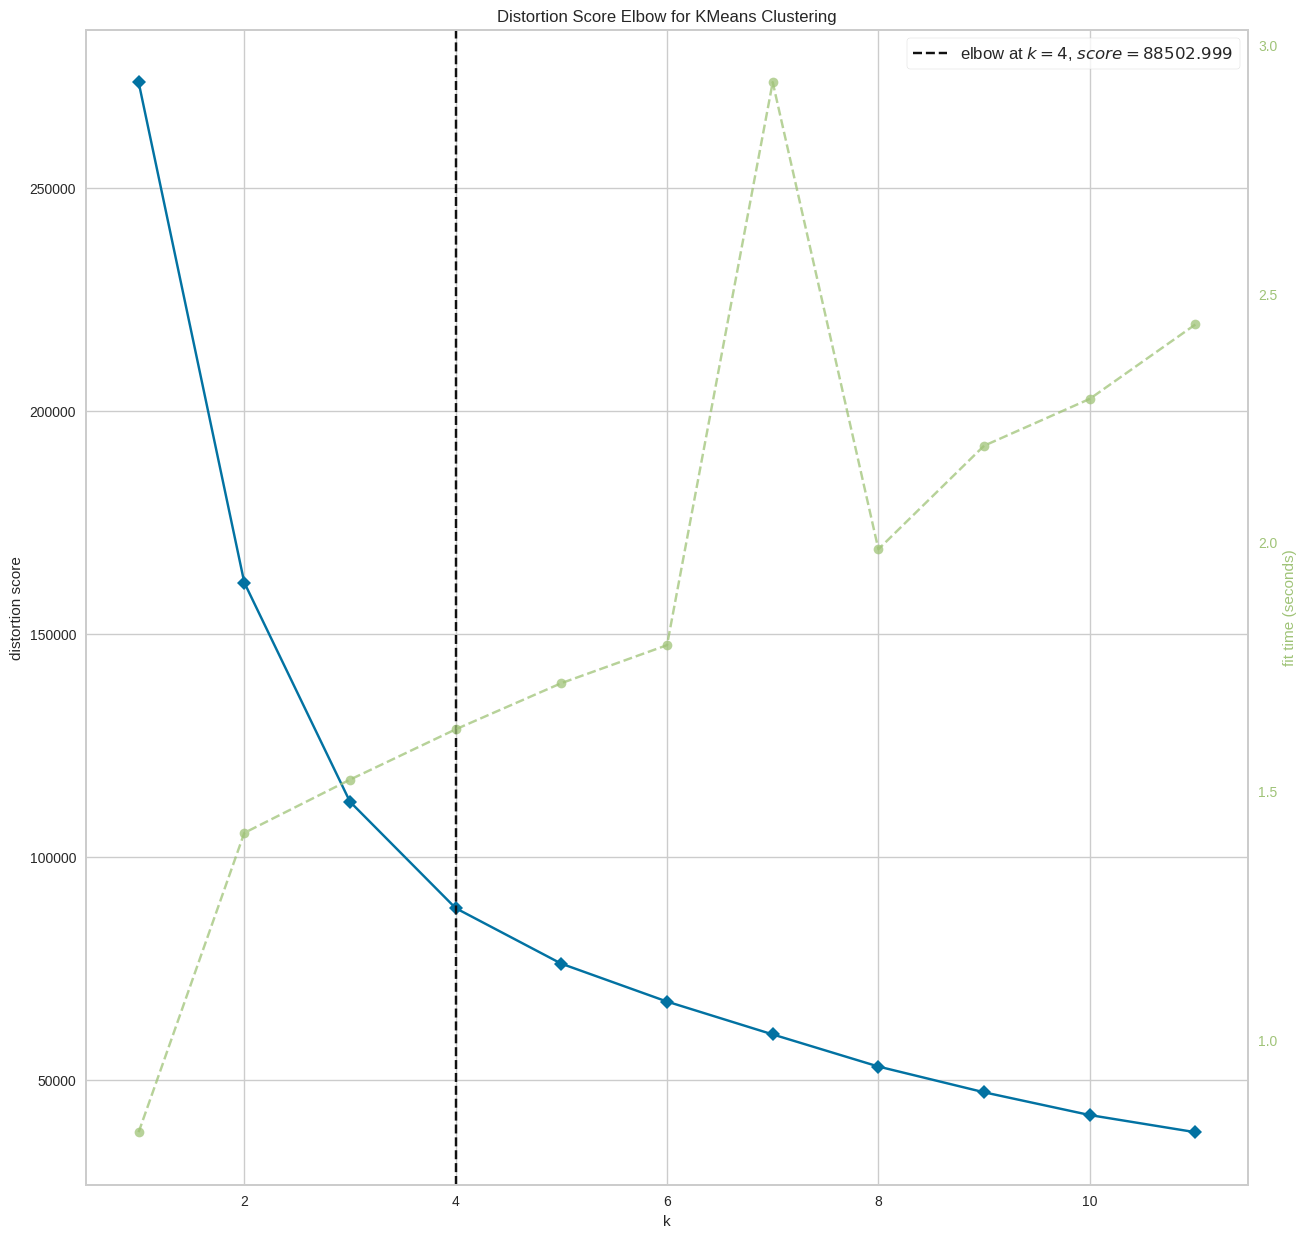

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [22]:
model = KMeans()
plt.figure(figsize=(15, 15))
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(x_scaled)  
visualizer.show()   

[2 2 3 ... 3 1 2]
 Our cluster centers are as follows
[[ 1.14066768 -0.36708882 -0.59758582]
 [-0.42675495  1.88721955  1.27234669]
 [-0.59309631 -0.03592175  1.11911055]
 [-0.63042165 -0.43288674 -0.6966956 ]]


,Recency,Monetary,Frequency
cluster_pred,,,
0,30571,30571,30571
1,12868,12868,12868
2,19398,19398,19398
3,28424,28424,28424


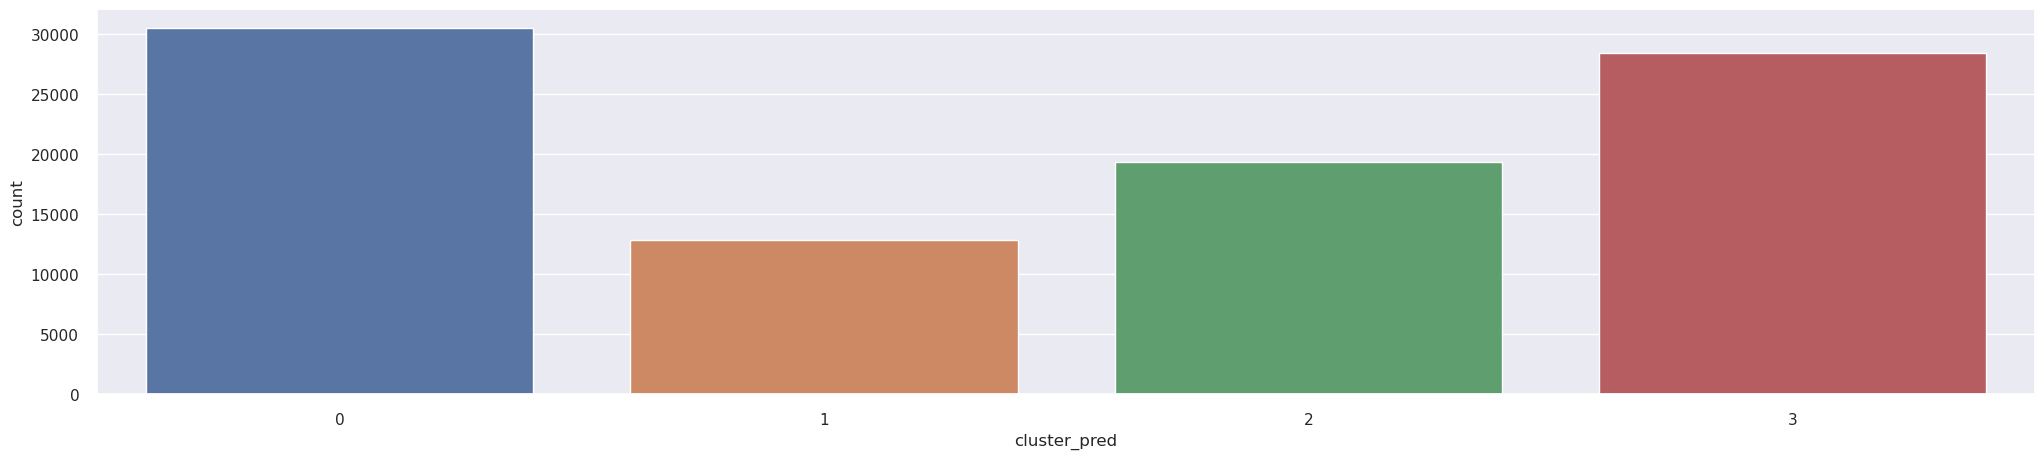

In [23]:
kmeans_scaled = KMeans(4)
kmeans_scaled.fit(x_scaled)
identified_clusters = kmeans_scaled.fit_predict(working_set)
clusters_scaled = working_set.copy()
clusters_scaled['cluster_pred']=kmeans_scaled.fit_predict(x_scaled)
print(identified_clusters)
sns.set(style="darkgrid")
print(" Our cluster centers are as follows")
print(kmeans_scaled.cluster_centers_)
f, ax = plt.subplots(figsize=(25, 5))
ax = sns.countplot(x="cluster_pred", data=clusters_scaled)
clusters_scaled.groupby(['cluster_pred']).count()

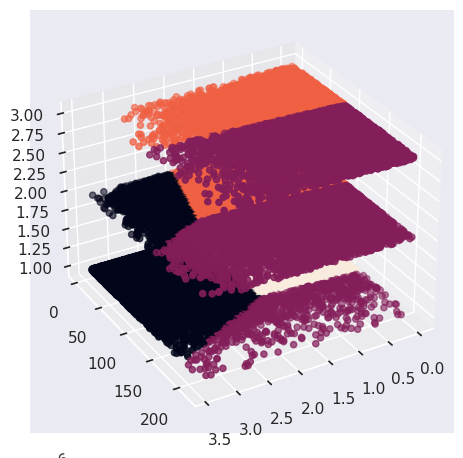

In [24]:
fig = plt.figure()
ax = plt.axes(projection='3d')
xline=clusters_scaled['Recency']
yline=clusters_scaled['Frequency']
zline=clusters_scaled['Monetary']

ax.scatter3D(xline, zline,yline,c=clusters_scaled['cluster_pred'])
ax.view_init(30, 60)

Silhouette Score: 0.378


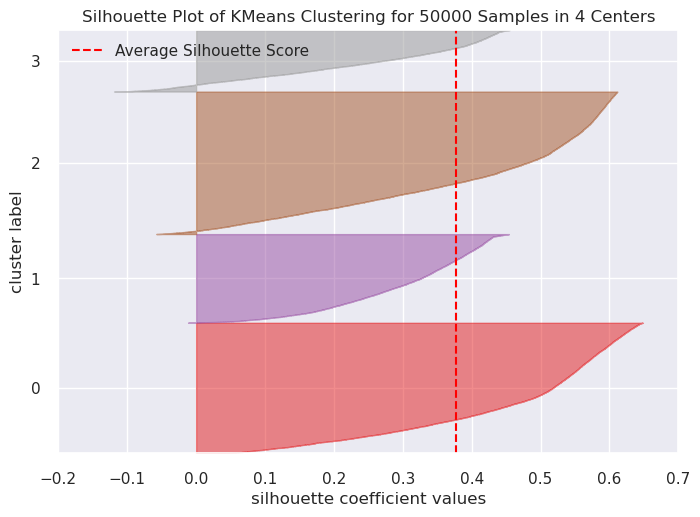

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 50000 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [25]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.utils import resample

data_sample = resample(x_scaled, n_samples=50000, random_state=69)

sil_score = silhouette_score(data_sample, kmeans_scaled.predict(data_sample), metric='euclidean')
print('Silhouette Score: %.3f' % sil_score)

from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(4)
visualizer = SilhouetteVisualizer(model)
visualizer.fit(data_sample)   
visualizer.poof()

## <p style="background-color:#3844a1;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px;">Insights to the Store Owners</span>

In [26]:
working_set['cluster']= clusters_scaled['cluster_pred']

working_set.groupby('cluster').agg({
    'Recency' : ['mean','min','max'],
    'Frequency' : ['mean','min','max'],
    'Monetary' : ['mean','min','max','count']
})

Recency                   Frequency            Monetary  \
                 mean      min      max      mean min max        mean   
cluster                                                                 
0        2.584026e+06  1660567  3421069  1.067090   1   2   42.222025   
1        1.060386e+06      112  3403988  2.335095   1   3  143.461175   
2        9.009908e+05       61  3180262  2.230745   2   3   57.031007   
3        8.646419e+05        6  1756602  1.000000   1   1   39.274543   

                                       
               min         max  count  
cluster                                
0         2.279202  176.638177  30571  
1        88.888889  216.239316  12868  
2         4.558405  105.698006  19398  
3         2.279202  132.193732  28424

**Cluster 2:** is the most important cluster with the low recency meaning the most recent time they had place an order was close and high frequecy and an acceptable level of Monetary spending

**Cluster 0:** the second important one with a little higher recency but the frequency and monatary spending being a little higher

**Cluster 1:** is the third most important